### Задание к дипломной работе:

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Признаки:
- 1.satisfaction_level​ - Уровень удовлетворенности работой
- 2.Last_evaluation ​- Время с момента последней оценки в годах
- 3.number_projects​ - Количество проектов, выполненных за время работы
- 4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
- 5.time_spend_company​ - Стаж работы в компании в годах
- 6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
- 7.left​ - уволился ли сотрудник
- 8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
- 9.department ​- отдел в котором работает сотрудник
- 10.salary​ - относительный уровень зарплаты

##### 1. Загрузите файл HR.csv в pandas dataframe

In [406]:
import pandas as pd

df = pd.read_csv('HR.csv') 
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


##### 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [408]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [409]:
# находим моду:
df_mode = df.round().mode()
df_mode[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1.0,1.0,4.0,135,3.0,0.0,0.0,0.0,sales,low


##### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.
1. satisfaction_level​ - Уровень удовлетворенности работой
2. last_evaluation ​- Время с момента последней оценки в годах
3. number_projects​ - Количество проектов, выполненных за время работы
4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5. time_spend_company​ - Стаж работы в компании в годах

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns

In [411]:
# оставил только кол-ные переменные
df_cor = df.drop(['salary', 'department', 'promotion_last_5years', 'left', 'Work_accident'], axis=1)
df_cor

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,0.57,2,151,3
14995,0.37,0.48,2,160,3
14996,0.37,0.53,2,143,3
14997,0.11,0.96,6,280,4


In [412]:
# коррел-я матрица
df_cor.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


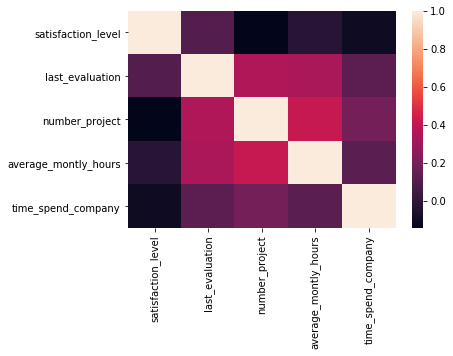

In [413]:
# тепловая карта
sns.heatmap(df_cor.corr())

# "number_project" и "average_montly_hours" - наиболее скоррелированные переменные.
# "satisfaction_level" и "number_project" - наименее скоррелированные переменные.

##### 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [414]:
dep_empl_df = df['department'].value_counts()
dep_empl_df
# dep_empl_df.sum()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

##### 5.Показать распределение сотрудников по зарплатам.

In [85]:
salary_empl_df = df['salary'].value_counts()
salary_empl_df
# salary_empl_df.sum()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

##### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [415]:
dep_sal_empl = df[['department', 'salary']]
dep_sal_empl

salary_pivot = dep_sal_empl.pivot_table(index='salary', columns='department', values='salary', 
                                        aggfunc='size', fill_value=0)
salary_pivot


department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


##### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [149]:
time_sal_empl = df[['salary', 'average_montly_hours']]
time_sal_empl

,salary,average_montly_hours
0,low,157
1,medium,262
2,medium,272
3,low,223
4,low,159
...,...,...
14994,low,151
14995,low,160
14996,low,143
14997,low,280


In [151]:
# Выборка сотрудников с низким окладом и время их средней выработкии в месяц.
time_sal_low = time_sal_empl[time_sal_empl.salary == 'low']['average_montly_hours']
time_sal_low

0        157
3        223
4        159
5        153
6        247
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 7316, dtype: int64

In [157]:
# Выборка сотрудников с высоким окладом и время их средней выработкии в месяц.
time_sal_high = time_sal_empl[time_sal_empl.salary == 'high']['average_montly_hours']
time_sal_high

72       149
111      289
189      156
267      129
306      149
        ... 
14829    148
14868    130
14902    159
14941    131
14980    238
Name: average_montly_hours, Length: 1237, dtype: int64

Ho: Сотрудники с высоким окладом проводят на работе одинаково времени с сотрудниками с низким окладом.
H1: Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.
альфа = 0,05

In [416]:
from scipy import stats as st
alpha = 0.05

result = st.ttest_ind(time_sal_high, time_sal_low, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


In [417]:
# Средняя сотрудников с высокой з.п. чуть ниже, но это статистически не значимо.

In [418]:
average_hours_df = df.groupby('salary')[['average_montly_hours']].mean()\
    .sort_values('average_montly_hours', ascending=True)

average_hours_df

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


##### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет                      
- Средняя степень удовлетворенности                                             
- Среднее количество проектов

In [426]:
# выборка данных по уволившимся сотрудникам
df_left = df[df.left == 1]
df_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [428]:
# выборка данныз по не уволившимся сотрудникам
df_noleft = df[df.left == 0]
df_noleft.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [444]:
prom_empl_left = df_left['promotion_last_5years'].value_counts(normalize=True)
print(f'Доля уволенных сотрудников получивших повышение за последние 5 лет: {round(prom_empl_left[1] * 100, 2)}%')
# round(prom_empl_left * 100, 2)

Доля уволенных сотрудников получивших повышение за последние 5 лет: 0.53%


In [445]:
prom_empl = df_noleft['promotion_last_5years'].value_counts(normalize=True)
print(f'Доля не уволенных сотрудников получивших повышение за последние 5 лет:{round(prom_empl[1] * 100, 2)}%')
# round(prom_empl * 100, 2)

Доля не уволенных сотрудников получивших повышение за последние 5 лет:2.63%


In [438]:
# Средняя степень удовлетворенности уволенных сотрудников
df_left.satisfaction_level.mean()


0.44009801176140917

In [439]:
# Средняя степень удовлетворенности не уволенных сотрудников
df_noleft.satisfaction_level.mean()

0.666809590479516

In [442]:
# Среднее количество проектов уволенных сотрудников
df_left.number_project.mean()

3.8555026603192384

In [443]:
# Среднее количество проектов не уволенных сотрудников
df_noleft.number_project.mean()

3.786664333216661

##### 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке. 

In [355]:
df_cor_2 = df.drop(['salary', 'department'], axis=1)
df_cor_2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [356]:
df_cor_2['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [383]:
left_df = df['left'].values
left_df
# len(left_df)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [405]:
import numpy as np
import matplotlib.pyplot as plt

In [359]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cor_2, left_df, test_size=0.25)

# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [360]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [361]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [362]:
# len(lda.predict(X_test))
# len(y_test)

In [363]:
# смотрим разницу факта(y_test) и прогноза (y predict)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,1,1
3748,1,1


In [364]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

# На основании имеющихся данных можно предсказать что сотрудник уволится с точностью до 77%.

# Качество pridict-модели оценивается точностью (accuracy_score) и составляет 77%.


0.7722666666666667

In [365]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.45511669e+00,  6.78322566e-01, -2.37834870e-01,
         4.36533296e-03,  2.30170953e-01, -1.05680671e+00,
         0.00000000e+00, -1.18389481e+00]])